<a href="https://www.kaggle.com/code/georgelukaanya/adamnea-monthly-insights?scriptVersionId=226249853" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the data and set the 'created_at' column as the index
carbondioxide = pd.read_csv('/kaggle/input/adamnea-monthly-data-apr2024-feb2025/hive_carbondioxide_APR_FEB_hive1.csv', index_col='created_at')
humidity = pd.read_csv('/kaggle/input/adamnea-monthly-data-apr2024-feb2025/hive_humidity_APR_FEB_hive1.csv', index_col='created_at')
temperatures = pd.read_csv('/kaggle/input/adamnea-monthly-data-apr2024-feb2025/hive_temperatures_APR_FEB_hive1.csv', index_col='created_at')
weights = pd.read_csv('/kaggle/input/adamnea-monthly-data-apr2024-feb2025/hive_weights_APR_FEB_hive1.csv', index_col='created_at')

# Convert the index to datetime
carbondioxide.index = pd.to_datetime(carbondioxide.index)
humidity.index = pd.to_datetime(humidity.index)
temperatures.index = pd.to_datetime(temperatures.index)
weights.index = pd.to_datetime(weights.index)


# Check for and remove duplicates in the index
humidity = humidity[~humidity.index.duplicated(keep='first')]
carbondioxide = carbondioxide[~carbondioxide.index.duplicated(keep='first')]
temperatures = temperatures[~temperatures.index.duplicated(keep='first')]
weights = weights[~weights.index.duplicated(keep='first')]

In [3]:
#Cleaning the humidity data
# Replace '*2*' with a comma in the 'record' column
humidity['record'] = humidity['record'].str.replace('*2*', ',', regex=False)

# Split the 'record' column and assign to new columns
humidity[['Interior (%)', 'Exterior (%)']] = humidity['record'].str.split(',', expand=True)

# Drop the 'record' column as it's no longer needed
humidity = humidity.drop(columns=['record'])

# Convert new columns to numeric types
humidity['Interior (%)'] = pd.to_numeric(humidity['Interior (%)'], errors='coerce')
humidity['Exterior (%)'] = pd.to_numeric(humidity['Exterior (%)'], errors='coerce')

# Replace values of 2 with NaN (without inplace to avoid warnings)
humidity['Interior (%)'] = humidity['Interior (%)'].replace(2, np.nan)
humidity['Exterior (%)'] = humidity['Exterior (%)'].replace(2, np.nan)

# Display the resulting DataFrame
humidity.head()


,Interior (%),Exterior (%)
created_at,,
2024-04-03 17:08:06,94.2,84.3
2024-04-03 23:10:57,93.2,91.9
2024-04-04 05:13:54,98.4,86.6
2024-04-04 11:17:07,88.6,70.6
2024-04-16 15:14:21,NaN,76.4


In [4]:
#Cleanind the CO2 data
#replacing 2 with NaN
carbondioxide['record'] = carbondioxide.record.replace(2, np.nan)
carbondioxide.head()

,record
created_at,
2024-04-03 17:08:06,7330.0
2024-04-03 23:10:57,6237.0
2024-04-04 05:13:54,1475.0
2024-04-04 11:17:07,195.0
2024-04-16 15:14:21,231.0


In [5]:
#Cleaning the weights data, replacing the 2 with NaN
weights.record = weights.record.replace(2, np.nan)
weights.head()

,record
created_at,
2024-04-03 17:08:06,15.0
2024-04-03 23:10:57,15.0
2024-04-04 05:13:54,15.0
2024-04-04 11:17:07,15.0
2024-04-16 15:14:21,15.0


In [6]:
#Cleaning the temperature data
# Replace '*2*' with a comma in the 'record' column
temperatures['record'] = temperatures['record'].str.replace('*2*', ',', regex=False)

# Split the 'record' column and assign to new columns
temperatures[['Interior (°C)', 'Exterior (°C)']] = temperatures['record'].str.split(',', expand=True)

# Drop the 'record' column as it's no longer needed
temperatures = temperatures.drop(columns=['record'])

# Convert new columns to numeric types
temperatures['Interior (°C)'] = pd.to_numeric(temperatures['Interior (°C)'], errors='coerce')
temperatures['Exterior (°C)'] = pd.to_numeric(temperatures['Exterior (°C)'], errors='coerce')

# Replace values of 2 with NaN (without inplace to avoid warnings)
temperatures['Interior (°C)'] = temperatures['Interior (°C)'].replace(2, np.nan)
temperatures['Exterior (°C)'] = temperatures['Exterior (°C)'].replace(2, np.nan)

# Display the resulting DataFrame
temperatures.head()


,Interior (°C),Exterior (°C)
created_at,,
2024-04-03 17:08:06,27.3,23.9
2024-04-03 23:10:57,23.7,21.2
2024-04-04 05:13:54,25.3,22.2
2024-04-04 11:17:07,29.5,28.6
2024-04-16 15:14:21,NaN,26.7


In [7]:
# Remove NaN values from each DataFrame
carbondioxide.dropna(inplace=True)
humidity.dropna(inplace=True)
temperatures.dropna(inplace=True)
weights.dropna(inplace=True)

In [8]:
carbondioxide.describe()

,record
count,955.000000
mean,6171.024084
std,4465.675647
min,195.000000
25%,3496.000000
50%,5364.000000
75%,7951.500000
max,22857.000000


In [9]:
weights.describe()

,record
count,853.000000
mean,24.930211
std,7.090898
min,0.030000
25%,23.880000
50%,26.200000
75%,26.330000
max,211.430000


In [10]:
temperatures.describe()

,Interior (°C),Exterior (°C)
count,934.000000,934.000000
mean,29.562527,23.683619
std,3.946438,2.838942
min,17.100000,17.700000
25%,27.125000,21.400000
50%,30.200000,23.100000
75%,32.800000,25.700000
max,35.800000,33.600000


In [11]:
humidity.describe()

,Interior (%),Exterior (%)
count,934.000000,934.000000
mean,81.598501,81.430621
std,4.202617,11.676294
min,57.900000,33.800000
25%,79.000000,74.325000
50%,81.800000,83.400000
75%,84.200000,90.100000
max,98.400000,99.900000


In [12]:
# Import the calendar module to get month names
import calendar

# Cell 1: Define the monthly_analysis function
def monthly_analysis(df, month, columns):
    """
    Perform exploratory data analysis for a given month on specified columns.
    
    Parameters:
    - df: DataFrame to analyze.
    - month: Integer month (1=January, 2=February, ...).
    - columns: List of columns for which to derive insights.
    
    Returns:
    - insights: Dictionary containing mean, standard deviation, IQR, skewness, and outliers count.
    """
    # Convert month number to month name
    month_name = calendar.month_name[month]
    
    # Filter data for the specified month
    monthly_data = df[df.index.month == month]
    
    insights = {}  # Dictionary to store calculated insights
    
    for col in columns:
        # Calculate and store each statistical metric
        insights[col] = {
            'mean': monthly_data[col].mean(),
            'std_dev': monthly_data[col].std(),
            'iqr': monthly_data[col].quantile(0.75) - monthly_data[col].quantile(0.25),
            'skewness': monthly_data[col].skew()
        }
        
        # Outlier detection based on IQR method
        q1 = monthly_data[col].quantile(0.25)
        q3 = monthly_data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = monthly_data[(monthly_data[col] < lower_bound) | (monthly_data[col] > upper_bound)]
        
        # Remove outliers for visualization
        monthly_data_no_outliers = monthly_data[~((monthly_data[col] < lower_bound) | (monthly_data[col] > upper_bound))]
        
        # Box plot for data with outliers removed
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=monthly_data_no_outliers, y=col)
        plt.title(f'{col} Box Plot ({month_name} - Outliers Removed)')
        plt.ylabel(col)
        plt.show()
        
        insights[col]['outliers_removed'] = outliers.shape[0]  # Record count of outliers
    
    return insights
    
# Function to display insights in a readable format
def display_insights(month_name, insights):
    print(f"{month_name} Insights:")
    for category, metrics in insights.items():
        print(f"\n{category}:")
        for metric, value in metrics.items():
            print(f"  {metric.capitalize()}: {value}")
    print("\n" + "="*40)


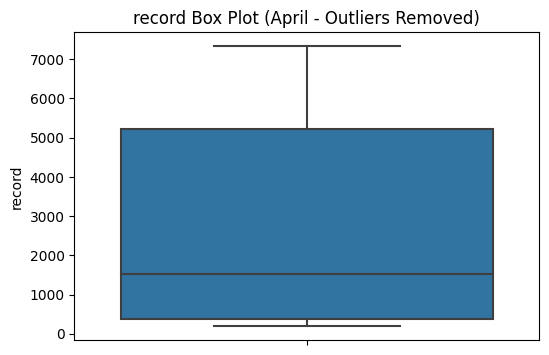

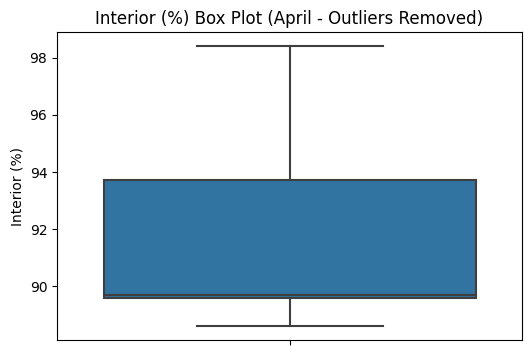

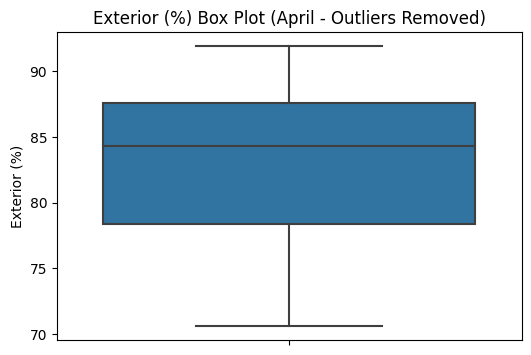

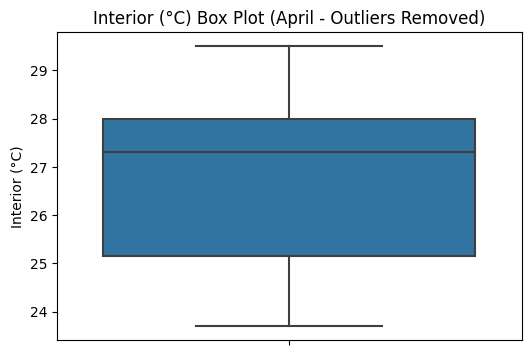

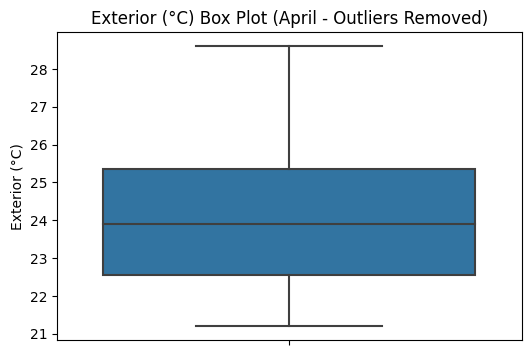

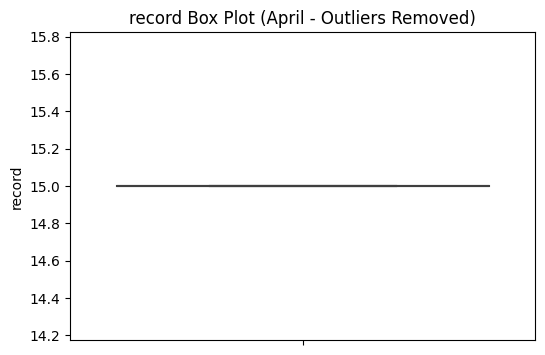

April CO2 Insights:

record:
  Mean: 2792.875
  Std_dev: 2900.6340901602875
  Iqr: 4837.5
  Skewness: 0.7139918965923079
  Outliers_removed: 0

April Humidity Insights:

Interior (%):
  Mean: 91.89999999999999
  Std_dev: 3.548708685329545
  Iqr: 4.1000000000000085
  Skewness: 1.1378545263610087
  Outliers_removed: 0

Exterior (%):
  Mean: 82.65714285714286
  Std_dev: 7.306357310100374
  Iqr: 9.200000000000003
  Skewness: -0.5132017718099261
  Outliers_removed: 0

April Temperature Insights:

Interior (°C):
  Mean: 26.685714285714287
  Std_dev: 2.05947288679132
  Iqr: 2.8500000000000014
  Skewness: -0.1850169471854653
  Outliers_removed: 0

Exterior (°C):
  Mean: 24.214285714285715
  Std_dev: 2.48020736460252
  Iqr: 2.8000000000000043
  Skewness: 0.762409469481088
  Outliers_removed: 0

April Weight Insights:

record:
  Mean: 15.0
  Std_dev: 0.0
  Iqr: 0.0
  Skewness: 0.0
  Outliers_removed: 0



In [13]:
# Example: Implement the analysis for April (month=4) on each dataset
co2_insights_april = monthly_analysis(carbondioxide, 4, ['record'])
humidity_insights_april = monthly_analysis(humidity, 4, ['Interior (%)', 'Exterior (%)'])
temperature_insights_april = monthly_analysis(temperatures, 4, ['Interior (°C)', 'Exterior (°C)'])
weight_insights_april = monthly_analysis(weights, 4, ['record'])

# Displaying April insights
display_insights("April CO2", co2_insights_april)
display_insights("April Humidity", humidity_insights_april)
display_insights("April Temperature", temperature_insights_april)
display_insights("April Weight", weight_insights_april)

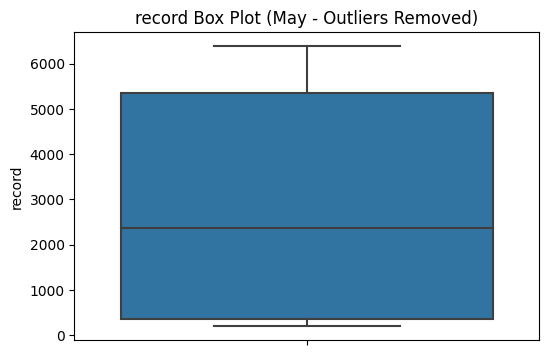

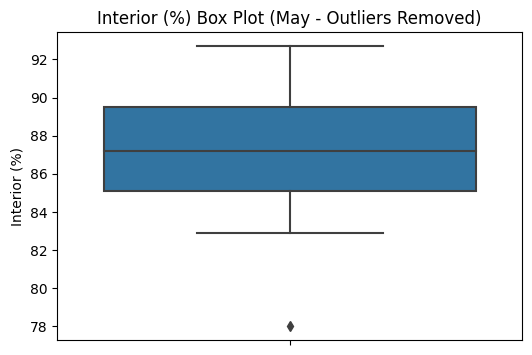

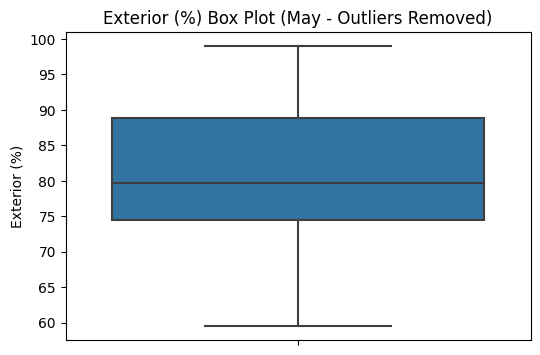

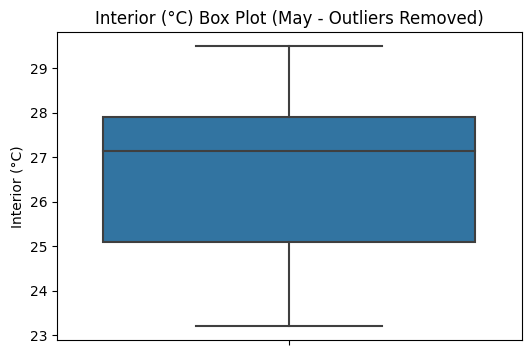

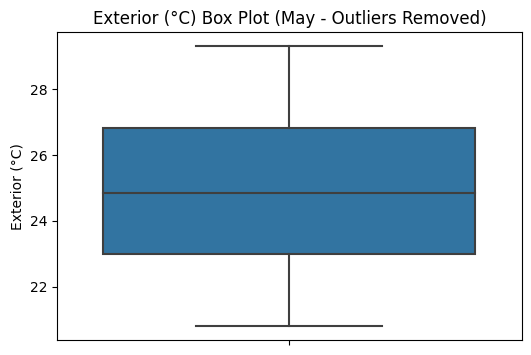

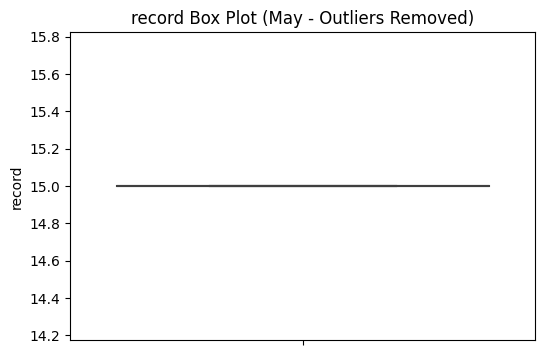

May CO2 Insights: Insights:

record:
  Mean: 2824.0833333333335
  Std_dev: 2429.720409739266
  Iqr: 4982.25
  Skewness: 0.17945231788536312
  Outliers_removed: 0

May Humidity Insights: Insights:

Interior (%):
  Mean: 86.57391304347826
  Std_dev: 5.34201105629742
  Iqr: 5.125
  Skewness: -3.543760206046381
  Outliers_removed: 1

Exterior (%):
  Mean: 80.34565217391305
  Std_dev: 9.807405513108487
  Iqr: 14.424999999999997
  Skewness: -0.13423296218479938
  Outliers_removed: 0

May Temperature Insights: Insights:

Interior (°C):
  Mean: 26.697826086956514
  Std_dev: 1.5971487275676657
  Iqr: 2.799999999999997
  Skewness: -0.36193251070187366
  Outliers_removed: 0

Exterior (°C):
  Mean: 24.871739130434776
  Std_dev: 2.249015887842528
  Iqr: 3.8249999999999993
  Skewness: 0.21777573384391924
  Outliers_removed: 0

May Weight Insights: Insights:

record:
  Mean: 16.747999999999998
  Std_dev: 3.1737585976825073
  Iqr: 0.0
  Skewness: 1.3544721123686005
  Outliers_removed: 11



In [14]:
#Perform analysis for May (month=5) on each dataset
co2_insights_may = monthly_analysis(carbondioxide, 5, ['record'])
humidity_insights_may = monthly_analysis(humidity, 5, ['Interior (%)', 'Exterior (%)'])
temperature_insights_may = monthly_analysis(temperatures, 5, ['Interior (°C)', 'Exterior (°C)'])
weight_insights_may = monthly_analysis(weights, 5, ['record'])

# Displaying May insights
display_insights("May CO2 Insights:", co2_insights_may)
display_insights("May Humidity Insights:", humidity_insights_may)
display_insights("May Temperature Insights:", temperature_insights_may)
display_insights("May Weight Insights:", weight_insights_may)


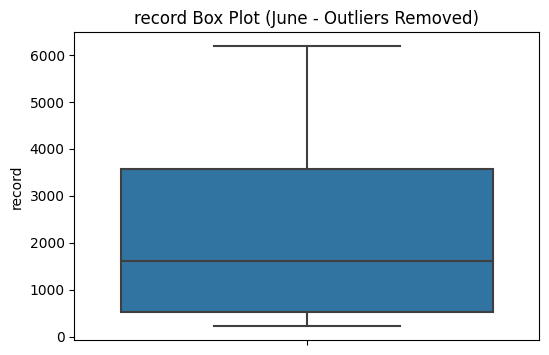

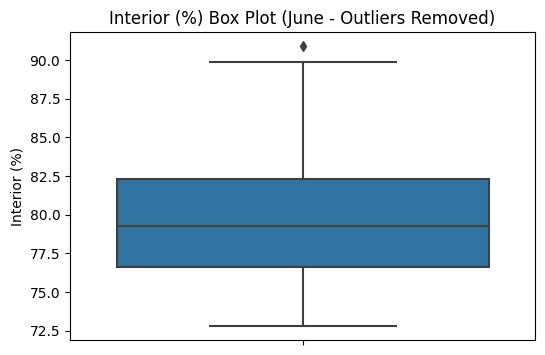

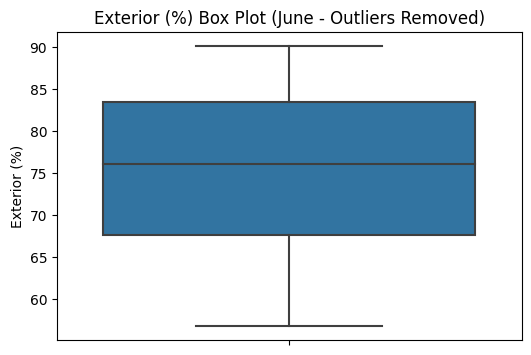

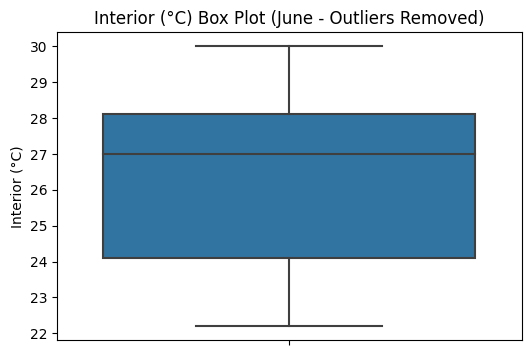

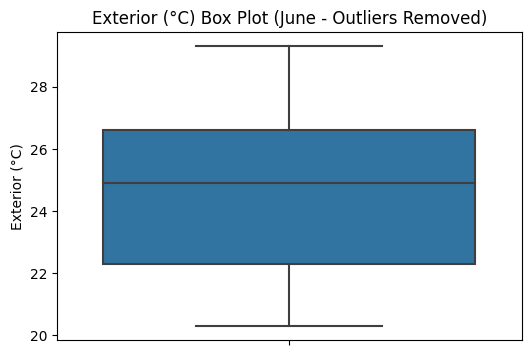

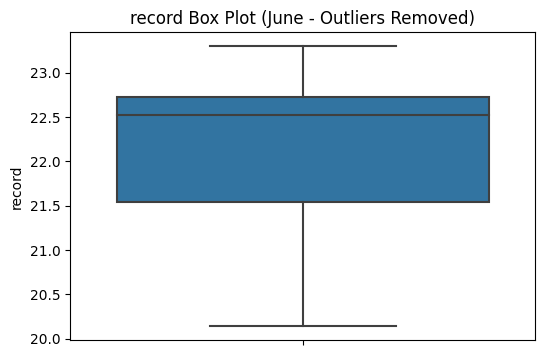

June CO2 Insights: Insights:

record:
  Mean: 2139.9402985074626
  Std_dev: 1674.2419893211288
  Iqr: 3050.5
  Skewness: 0.4554507405543834
  Outliers_removed: 0

June Humidity Insights: Insights:

Interior (%):
  Mean: 79.58923076923077
  Std_dev: 5.255001280831286
  Iqr: 5.8999999999999915
  Skewness: -0.09807894719619464
  Outliers_removed: 3

Exterior (%):
  Mean: 75.40153846153846
  Std_dev: 8.899517056905607
  Iqr: 15.800000000000011
  Skewness: -0.2873426380840099
  Outliers_removed: 0

June Temperature Insights: Insights:

Interior (°C):
  Mean: 26.401538461538465
  Std_dev: 2.0942997269144277
  Iqr: 4.0
  Skewness: -0.25505470775703243
  Outliers_removed: 0

Exterior (°C):
  Mean: 24.643076923076922
  Std_dev: 2.4997480642287506
  Iqr: 4.300000000000001
  Skewness: 0.05448122237629791
  Outliers_removed: 0

June Weight Insights: Insights:

record:
  Mean: 22.23170731707317
  Std_dev: 0.9298088578816196
  Iqr: 1.1799999999999997
  Skewness: -0.15429049990925076
  Outliers_remov

In [15]:
#Perform analysis for April (month=4) on each dataset
co2_insights_june = monthly_analysis(carbondioxide, 6, ['record'])
humidity_insights_june = monthly_analysis(humidity, 6, ['Interior (%)', 'Exterior (%)'])
temperature_insights_june = monthly_analysis(temperatures, 6, ['Interior (°C)', 'Exterior (°C)'])
weight_insights_june = monthly_analysis(weights, 6, ['record'])

# Displaying April insights
display_insights("June CO2 Insights:", co2_insights_june)
display_insights("June Humidity Insights:", humidity_insights_june)
display_insights("June Temperature Insights:", temperature_insights_june)
display_insights("June Weight Insights:", weight_insights_june)


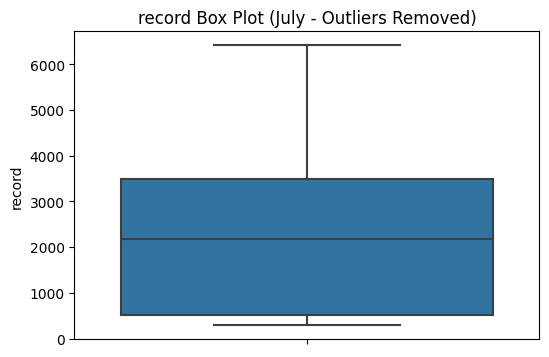

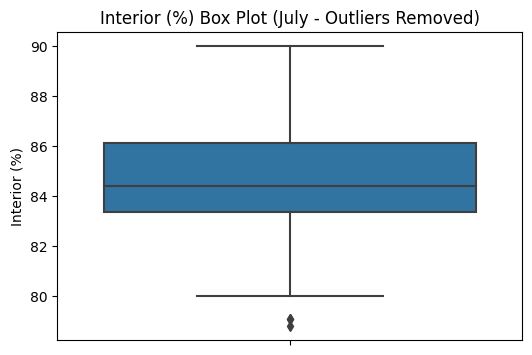

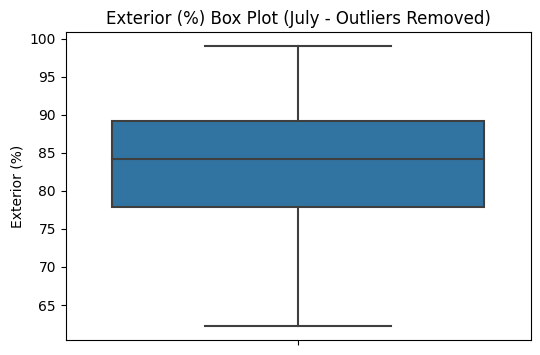

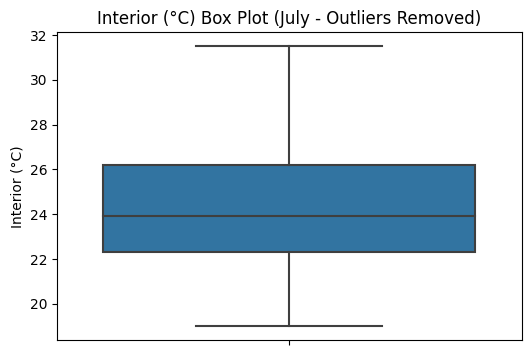

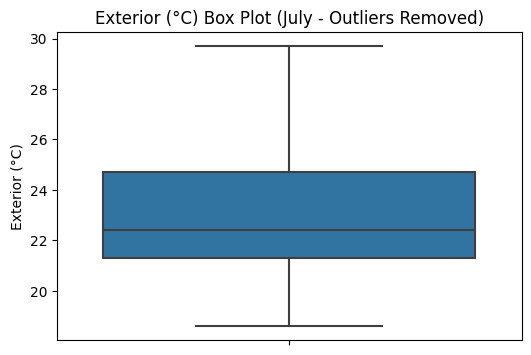

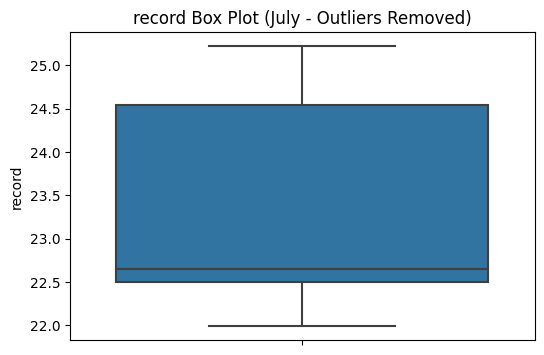

July CO2 Insights: Insights:

record:
  Mean: 2238.409836065574
  Std_dev: 1741.5737108868434
  Iqr: 3000.5
  Skewness: 0.9036084359397007
  Outliers_removed: 3

July Humidity Insights: Insights:

Interior (%):
  Mean: 83.56243093922652
  Std_dev: 3.4762563918889184
  Iqr: 2.9000000000000057
  Skewness: -1.2693154854009976
  Outliers_removed: 21

Exterior (%):
  Mean: 82.51933701657458
  Std_dev: 8.97357921915528
  Iqr: 11.599999999999994
  Skewness: -0.6847062174066525
  Outliers_removed: 4

July Temperature Insights: Insights:

Interior (°C):
  Mean: 24.197790055248614
  Std_dev: 2.60527148939532
  Iqr: 3.8999999999999986
  Skewness: 0.3421757827940549
  Outliers_removed: 0

Exterior (°C):
  Mean: 23.092817679558006
  Std_dev: 2.4687611186623606
  Iqr: 3.3999999999999986
  Skewness: 0.7254884716692194
  Outliers_removed: 0

July Weight Insights: Insights:

record:
  Mean: 23.353879781420765
  Std_dev: 1.0610500328831203
  Iqr: 2.0450000000000017
  Skewness: 0.4071210115035737
  Outli

In [16]:
#Perform analysis for June (month=6) on each dataset
co2_insights_july = monthly_analysis(carbondioxide, 7, ['record'])
humidity_insights_july = monthly_analysis(humidity, 7, ['Interior (%)', 'Exterior (%)'])
temperature_insights_july = monthly_analysis(temperatures, 7, ['Interior (°C)', 'Exterior (°C)'])
weight_insights_july = monthly_analysis(weights, 7, ['record'])

# Displaying June insights
display_insights("July CO2 Insights:", co2_insights_july)
display_insights("July Humidity Insights:", humidity_insights_july)
display_insights("July Temperature Insights:", temperature_insights_july)
display_insights("July Weight Insights:", weight_insights_july)


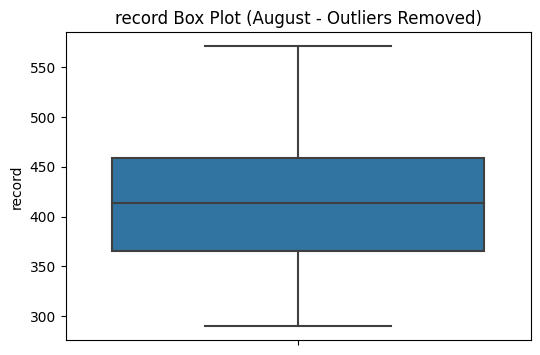

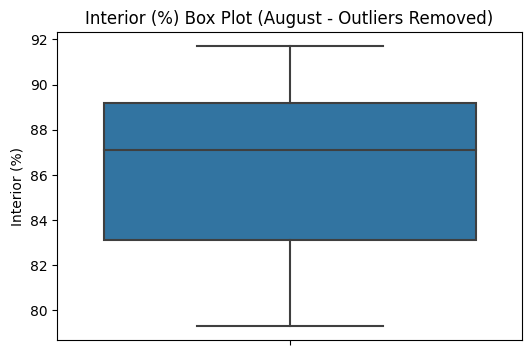

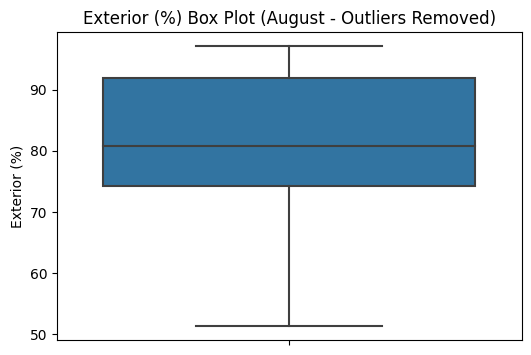

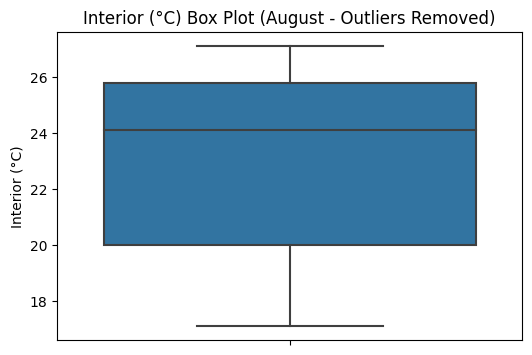

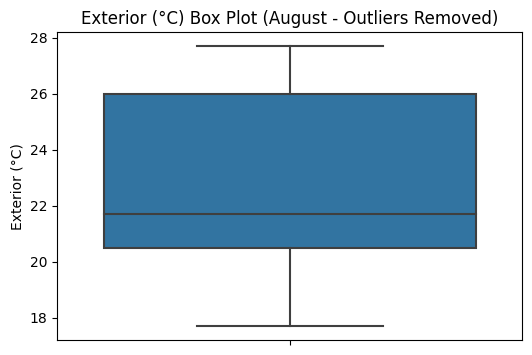

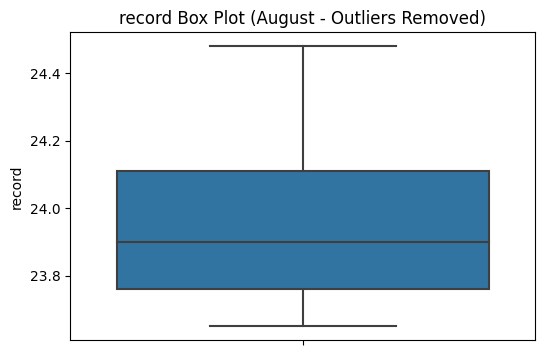

August CO2 Insights: Insights:

record:
  Mean: 440.47058823529414
  Std_dev: 115.50276925633581
  Iqr: 101.0
  Skewness: 1.653404663338623
  Outliers_removed: 1

August Humidity Insights: Insights:

Interior (%):
  Mean: 86.25882352941174
  Std_dev: 3.7018675731867785
  Iqr: 6.1000000000000085
  Skewness: -0.28830921436552726
  Outliers_removed: 0

Exterior (%):
  Mean: 80.72941176470587
  Std_dev: 13.73279672471536
  Iqr: 17.700000000000003
  Skewness: -0.6133188803104667
  Outliers_removed: 0

August Temperature Insights: Insights:

Interior (°C):
  Mean: 23.029411764705884
  Std_dev: 3.317710940144265
  Iqr: 5.800000000000001
  Skewness: -0.4191978515866204
  Outliers_removed: 0

Exterior (°C):
  Mean: 23.029411764705884
  Std_dev: 3.3348097220610566
  Iqr: 5.5
  Skewness: -0.013796804964672789
  Outliers_removed: 0

August Weight Insights: Insights:

record:
  Mean: 24.061764705882354
  Std_dev: 0.3764013033671254
  Iqr: 0.370000000000001
  Skewness: 1.1086990402642403
  Outliers_

In [17]:
#Perform analysis for August (month=8) on each dataset
co2_insights_august = monthly_analysis(carbondioxide, 8, ['record'])
humidity_insights_august = monthly_analysis(humidity, 8, ['Interior (%)', 'Exterior (%)'])
temperature_insights_august = monthly_analysis(temperatures, 8, ['Interior (°C)', 'Exterior (°C)'])
weight_insights_august = monthly_analysis(weights, 8, ['record'])

# Displaying April insights
display_insights("August CO2 Insights:", co2_insights_august)
display_insights("August Humidity Insights:", humidity_insights_august)
display_insights("August Temperature Insights:", temperature_insights_august)
display_insights("August Weight Insights:", weight_insights_august)


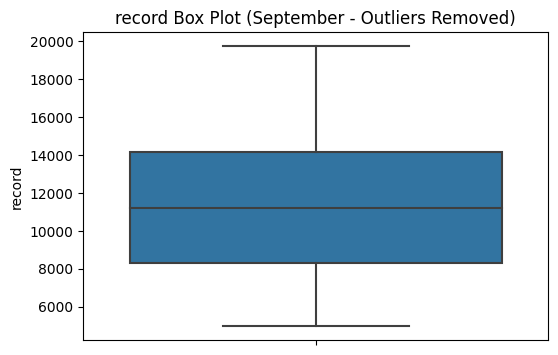

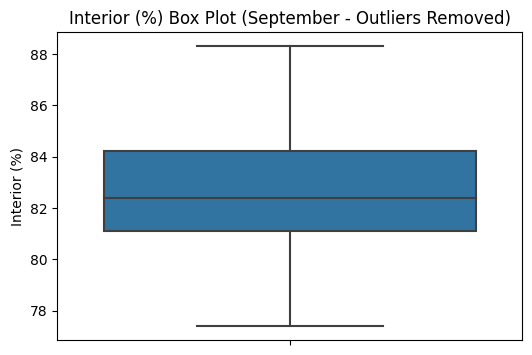

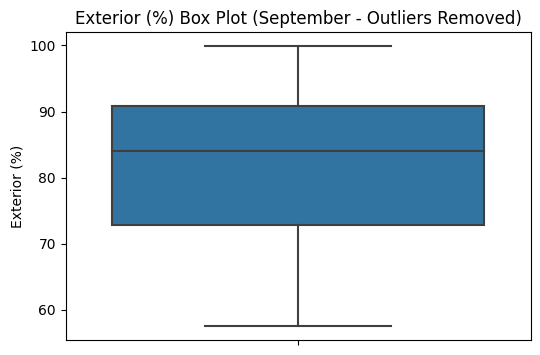

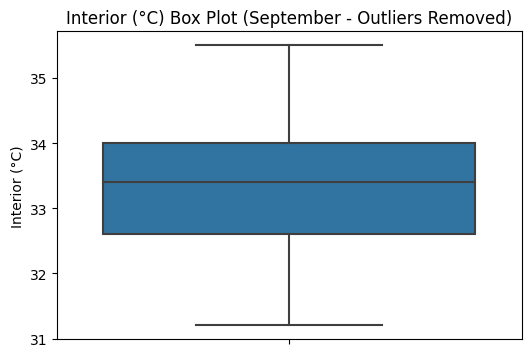

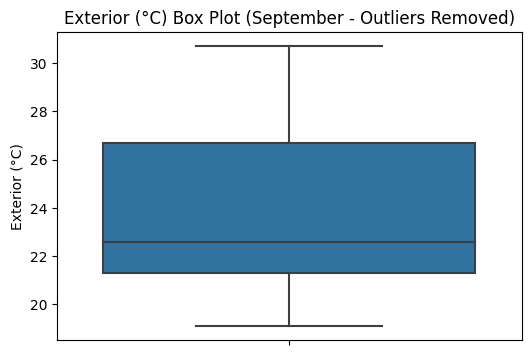

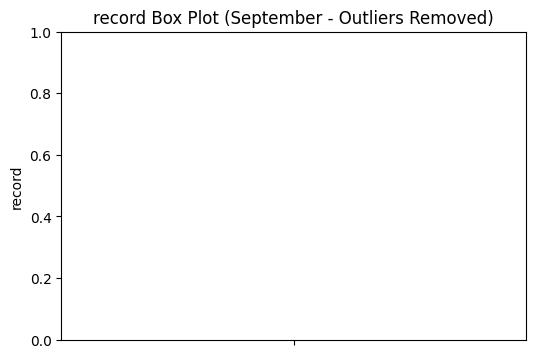

September CO2 Insights: Insights:

record:
  Mean: 11330.290322580646
  Std_dev: 3992.388953205249
  Iqr: 5894.5
  Skewness: 0.2880359420368359
  Outliers_removed: 0

September Humidity Insights: Insights:

Interior (%):
  Mean: 82.28999999999998
  Std_dev: 2.755253841084985
  Iqr: 3.2250000000000085
  Skewness: -0.4346497606949854
  Outliers_removed: 2

Exterior (%):
  Mean: 81.93666666666665
  Std_dev: 11.271803228525545
  Iqr: 17.900000000000006
  Skewness: -0.2651240996843035
  Outliers_removed: 0

September Temperature Insights: Insights:

Interior (°C):
  Mean: 33.343333333333334
  Std_dev: 1.2546005734376404
  Iqr: 1.4500000000000028
  Skewness: -0.09922635330926273
  Outliers_removed: 1

Exterior (°C):
  Mean: 23.84166666666666
  Std_dev: 3.243888212386992
  Iqr: 5.3750000000000036
  Skewness: 0.4303909882797419
  Outliers_removed: 0

September Weight Insights: Insights:

record:
  Mean: nan
  Std_dev: nan
  Iqr: nan
  Skewness: nan
  Outliers_removed: 0



In [18]:
#Perform analysis for September (month=9) on each dataset
co2_insights_september = monthly_analysis(carbondioxide, 9, ['record'])
humidity_insights_september = monthly_analysis(humidity, 9, ['Interior (%)', 'Exterior (%)'])
temperature_insights_september = monthly_analysis(temperatures, 9, ['Interior (°C)', 'Exterior (°C)'])
weight_insights_september = monthly_analysis(weights, 9, ['record'])

# Displaying April insights
display_insights("September CO2 Insights:", co2_insights_september)
display_insights("September Humidity Insights:", humidity_insights_september)
display_insights("September Temperature Insights:", temperature_insights_september)
display_insights("September Weight Insights:", weight_insights_september)


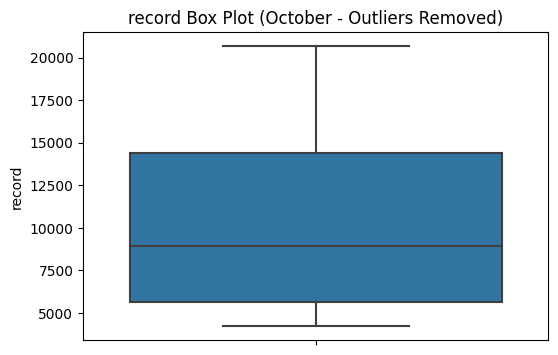

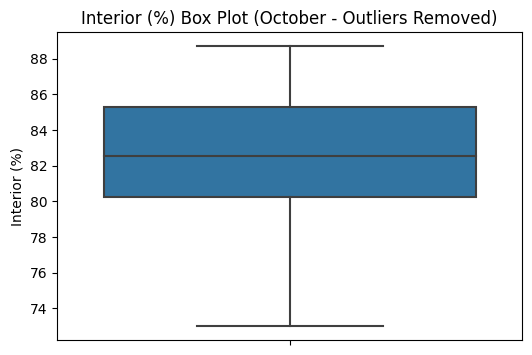

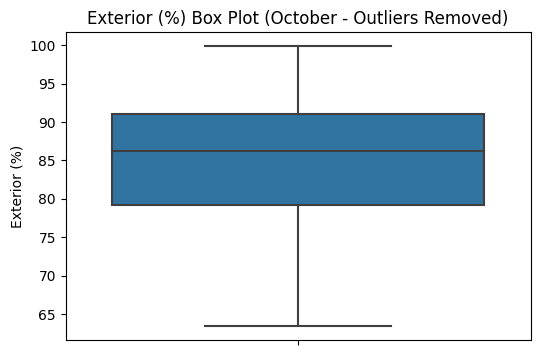

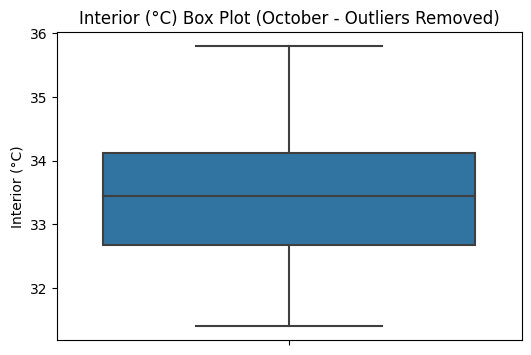

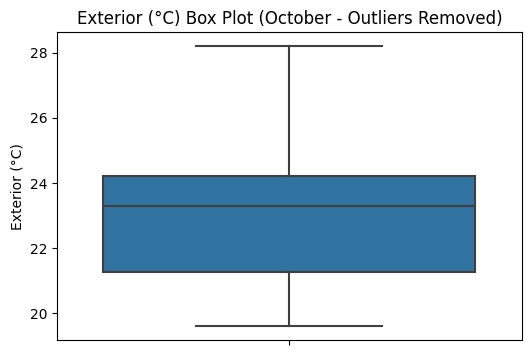

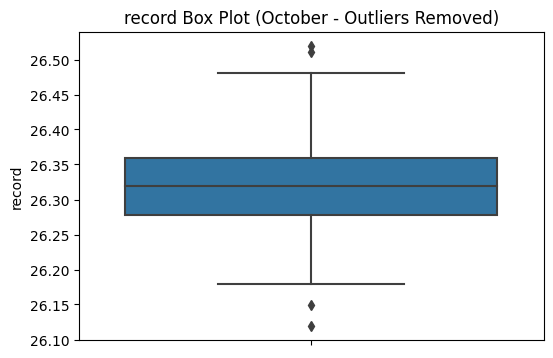

October CO2 Insights: Insights:

record:
  Mean: 10186.44761904762
  Std_dev: 4679.243429931465
  Iqr: 8753.0
  Skewness: 0.35478801424803075
  Outliers_removed: 0

October Humidity Insights: Insights:

Interior (%):
  Mean: 81.98653846153844
  Std_dev: 4.054149443131593
  Iqr: 5.25
  Skewness: -0.7277150734323777
  Outliers_removed: 2

Exterior (%):
  Mean: 84.89038461538462
  Std_dev: 8.742292241571576
  Iqr: 11.949999999999989
  Skewness: -0.4942143433870266
  Outliers_removed: 0

October Temperature Insights: Insights:

Interior (°C):
  Mean: 33.47692307692308
  Std_dev: 1.0268465034260024
  Iqr: 1.4499999999999957
  Skewness: 0.13002948373120787
  Outliers_removed: 0

Exterior (°C):
  Mean: 23.251923076923074
  Std_dev: 2.3532658888319347
  Iqr: 2.9750000000000014
  Skewness: 0.595954128625525
  Outliers_removed: 2

October Weight Insights: Insights:

record:
  Mean: 27.405638297872347
  Std_dev: 19.69422095020534
  Iqr: 0.10000000000000142
  Skewness: 8.886481657395088
  Outliers

In [19]:
#Implement the analysis for October (month=10) on each dataset
co2_insights_october = monthly_analysis(carbondioxide, 10, ['record'])
humidity_insights_october = monthly_analysis(humidity, 10, ['Interior (%)', 'Exterior (%)'])
temperature_insights_october = monthly_analysis(temperatures, 10, ['Interior (°C)', 'Exterior (°C)'])
weight_insights_october = monthly_analysis(weights, 10, ['record'])

# Displaying April insights
display_insights("October CO2 Insights:", co2_insights_october)
display_insights("October Humidity Insights:", humidity_insights_october)
display_insights("October Temperature Insights:", temperature_insights_october)
display_insights("October Weight Insights:", weight_insights_october)


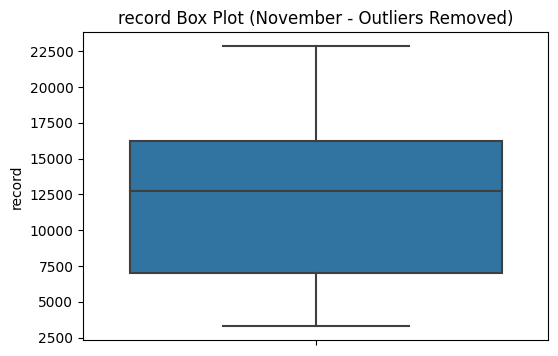

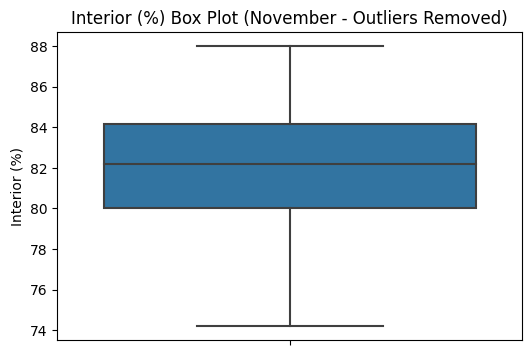

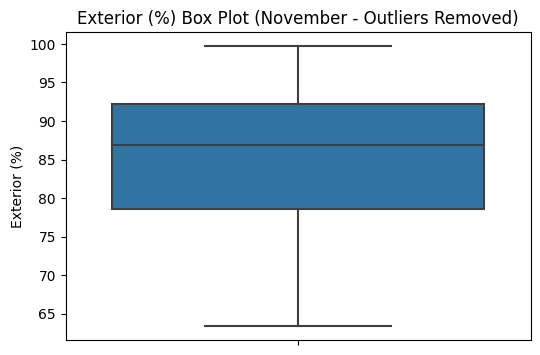

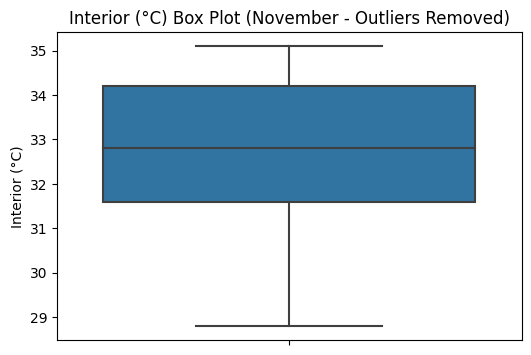

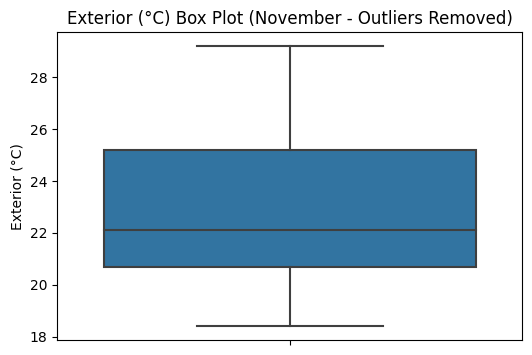

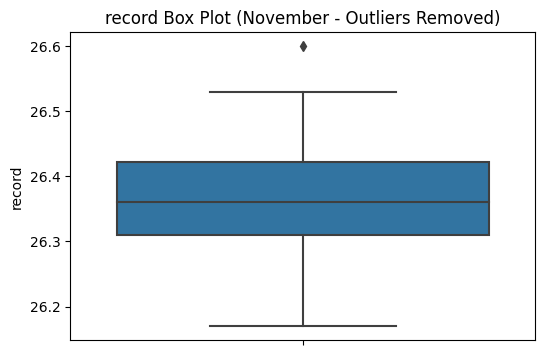

November CO2 Insights: Insights:

record:
  Mean: 12172.854838709678
  Std_dev: 5469.654842248901
  Iqr: 9193.75
  Skewness: 0.04946820868637204
  Outliers_removed: 0

November Humidity Insights: Insights:

Interior (%):
  Mean: 81.78387096774195
  Std_dev: 3.0857256525410457
  Iqr: 4.1499999999999915
  Skewness: -0.5096487572973877
  Outliers_removed: 0

Exterior (%):
  Mean: 84.80967741935484
  Std_dev: 10.199143481836517
  Iqr: 14.100000000000009
  Skewness: -0.6140982893664855
  Outliers_removed: 1

November Temperature Insights: Insights:

Interior (°C):
  Mean: 32.78064516129033
  Std_dev: 1.6522055512256315
  Iqr: 2.6000000000000014
  Skewness: -0.4567176396897494
  Outliers_removed: 0

Exterior (°C):
  Mean: 22.98548387096774
  Std_dev: 2.890790734990356
  Iqr: 4.524999999999999
  Skewness: 0.5124859101173939
  Outliers_removed: 0

November Weight Insights: Insights:

record:
  Mean: 26.368064516129028
  Std_dev: 0.11975163792544825
  Iqr: 0.11750000000000327
  Skewness: 1.1649

In [20]:
#Implement the analysis for November (month=11) on each dataset
co2_insights_november = monthly_analysis(carbondioxide, 11, ['record'])
humidity_insights_november = monthly_analysis(humidity, 11, ['Interior (%)', 'Exterior (%)'])
temperature_insights_november = monthly_analysis(temperatures, 11, ['Interior (°C)', 'Exterior (°C)'])
weight_insights_november = monthly_analysis(weights, 11, ['record'])

# Displaying November insights
display_insights("November CO2 Insights:", co2_insights_november)
display_insights("November Humidity Insights:", humidity_insights_november)
display_insights("November Temperature Insights:", temperature_insights_november)
display_insights("November Weight Insights:", weight_insights_november)


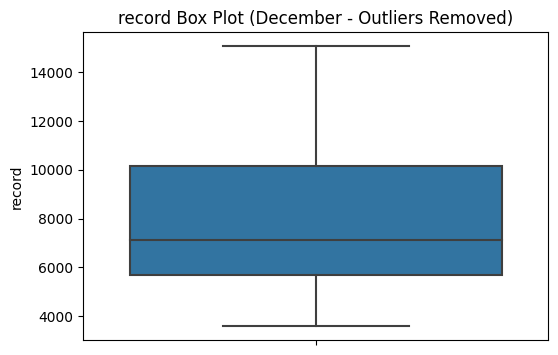

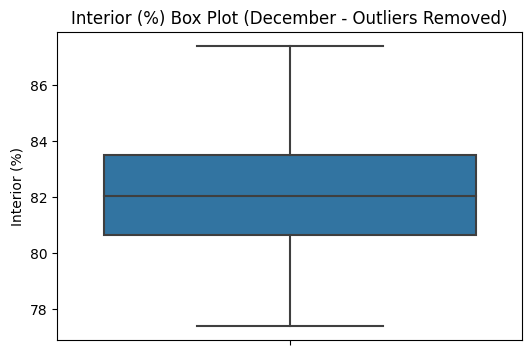

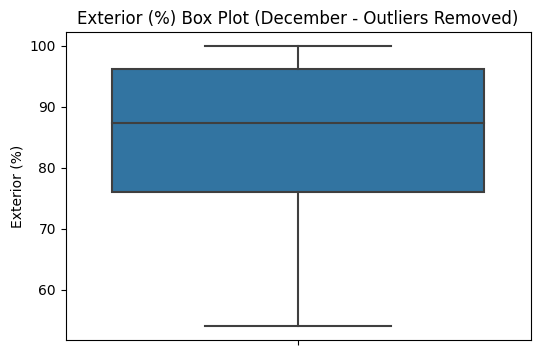

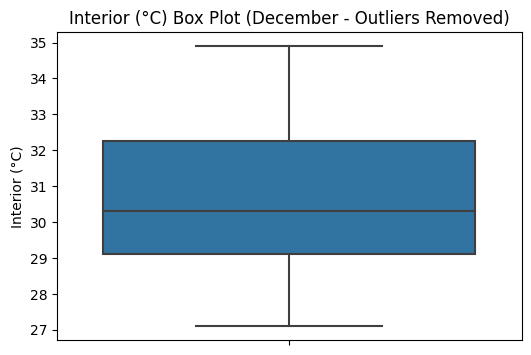

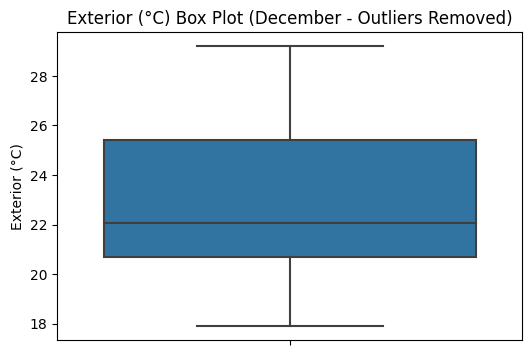

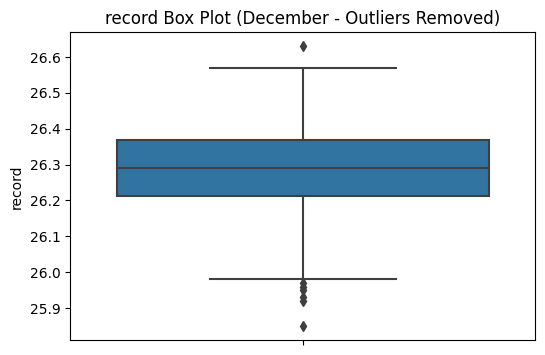

December CO2 Insights: Insights:

record:
  Mean: 7778.756944444444
  Std_dev: 2800.6135372925205
  Iqr: 4478.25
  Skewness: 0.5671353679078378
  Outliers_removed: 0

December Humidity Insights: Insights:

Interior (%):
  Mean: 82.01901408450703
  Std_dev: 2.1029844749612114
  Iqr: 2.8500000000000085
  Skewness: 0.019458250384203582
  Outliers_removed: 0

Exterior (%):
  Mean: 84.67183098591549
  Std_dev: 13.017954683491736
  Iqr: 20.25
  Skewness: -0.6296257922376889
  Outliers_removed: 0

December Temperature Insights: Insights:

Interior (°C):
  Mean: 30.672535211267604
  Std_dev: 1.9016657262022592
  Iqr: 3.1499999999999986
  Skewness: 0.36639360351049016
  Outliers_removed: 0

Exterior (°C):
  Mean: 22.979577464788733
  Std_dev: 2.7389633782826794
  Iqr: 4.699999999999999
  Skewness: 0.48455055760275234
  Outliers_removed: 0

December Weight Insights: Insights:

record:
  Mean: 26.18597222222222
  Std_dev: 0.2799983003056414
  Iqr: 0.21499999999999986
  Skewness: -1.52904195120433

In [27]:
#Implement the analysis for December (month=12) on each dataset
co2_insights_december = monthly_analysis(carbondioxide, 12, ['record'])
humidity_insights_december = monthly_analysis(humidity, 12, ['Interior (%)', 'Exterior (%)'])
temperature_insights_december = monthly_analysis(temperatures, 12, ['Interior (°C)', 'Exterior (°C)'])
weight_insights_december = monthly_analysis(weights, 12, ['record'])

# Displaying November insights
display_insights("December CO2 Insights:", co2_insights_december)
display_insights("December Humidity Insights:", humidity_insights_december)
display_insights("December Temperature Insights:", temperature_insights_december)
display_insights("December Weight Insights:", weight_insights_december)


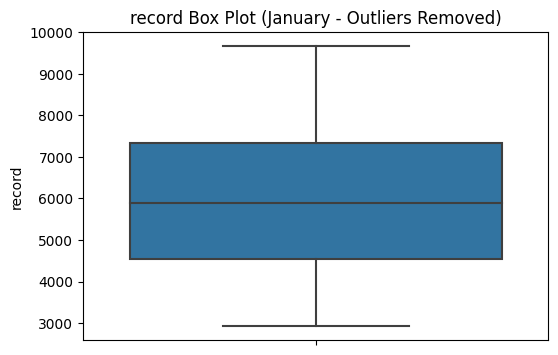

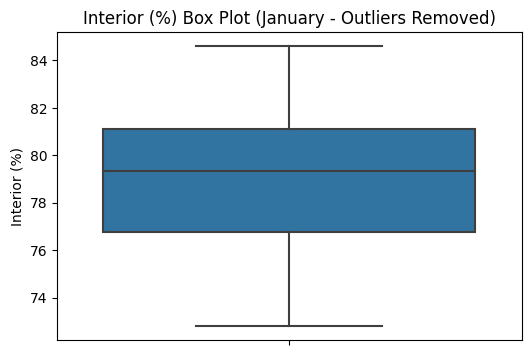

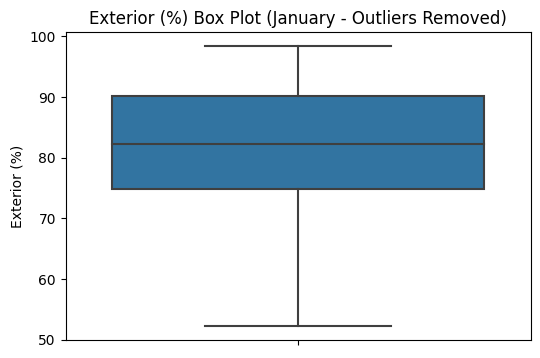

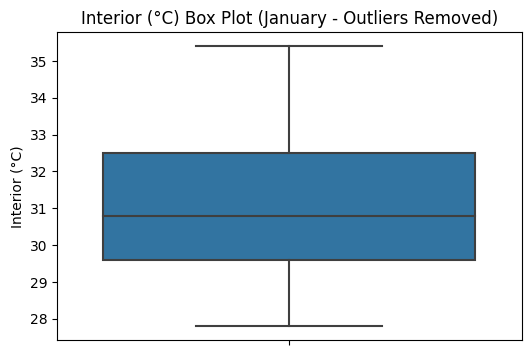

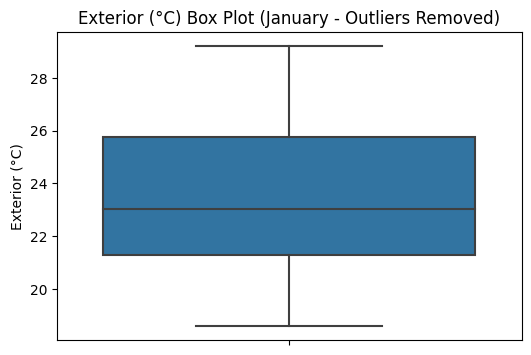

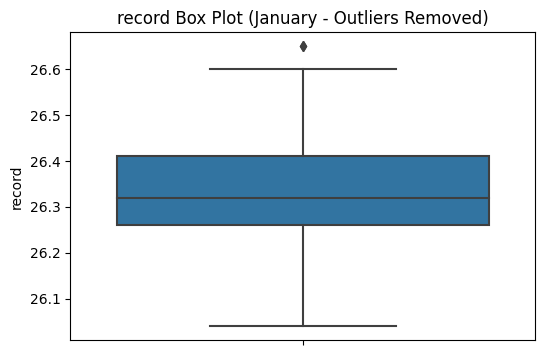

January CO2 Insights: Insights:

record:
  Mean: 6042.954198473282
  Std_dev: 1697.4245145223595
  Iqr: 2799.5
  Skewness: 0.11279880826513969
  Outliers_removed: 0

January Humidity Insights: Insights:

Interior (%):
  Mean: 79.02222222222223
  Std_dev: 2.8532897192928415
  Iqr: 4.324999999999989
  Skewness: -0.2618231499443204
  Outliers_removed: 0

Exterior (%):
  Mean: 80.76507936507937
  Std_dev: 11.322637978565366
  Iqr: 15.825000000000003
  Skewness: -0.6447116810898541
  Outliers_removed: 1

January Temperature Insights: Insights:

Interior (°C):
  Mean: 31.020634920634922
  Std_dev: 1.8181448769695976
  Iqr: 2.8999999999999986
  Skewness: 0.5535033702303295
  Outliers_removed: 0

Exterior (°C):
  Mean: 23.530952380952375
  Std_dev: 2.6180745378453767
  Iqr: 4.449999999999999
  Skewness: 0.3018493066067349
  Outliers_removed: 0

January Weight Insights: Insights:

record:
  Mean: 26.382595419847327
  Std_dev: 0.7337622626796141
  Iqr: 0.16999999999999815
  Skewness: 5.773766501

In [24]:
#Implement the analysis for January (month=1) on each dataset
co2_insights_january = monthly_analysis(carbondioxide, 1, ['record'])
humidity_insights_january = monthly_analysis(humidity, 1, ['Interior (%)', 'Exterior (%)'])
temperature_insights_january = monthly_analysis(temperatures, 1, ['Interior (°C)', 'Exterior (°C)'])
weight_insights_january = monthly_analysis(weights, 1, ['record'])

# Displaying April insights
display_insights("January CO2 Insights:", co2_insights_january)
display_insights("January Humidity Insights:", humidity_insights_january)
display_insights("January Temperature Insights:", temperature_insights_january)
display_insights("January Weight Insights:", weight_insights_january)


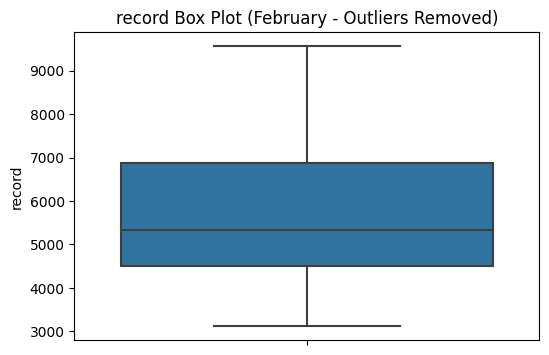

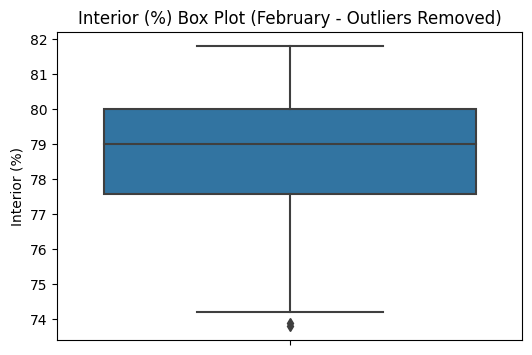

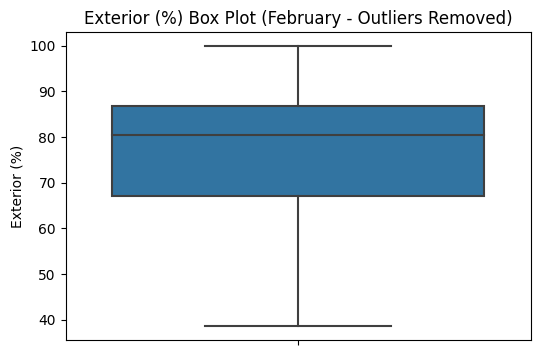

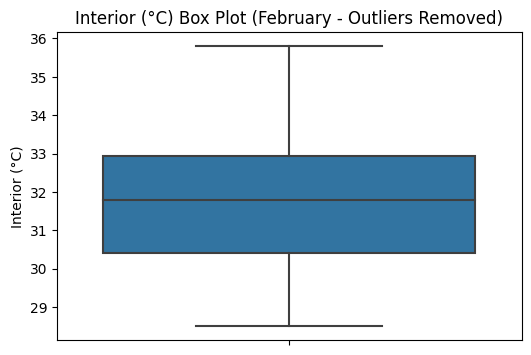

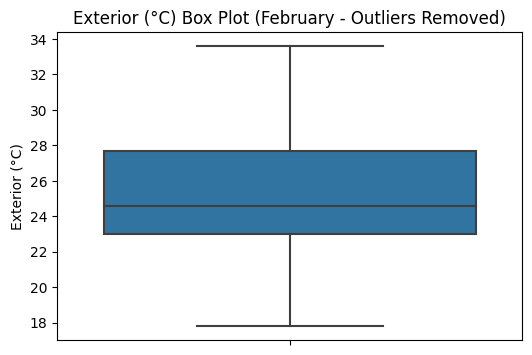

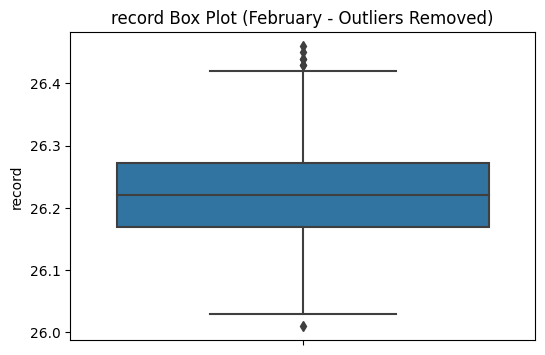

February CO2 Insights: Insights:

record:
  Mean: 5753.09375
  Std_dev: 1540.1531135536416
  Iqr: 2381.5
  Skewness: 0.6278572104921212
  Outliers_removed: 1

February Humidity Insights: Insights:

Interior (%):
  Mean: 78.10241935483872
  Std_dev: 2.7928906175454786
  Iqr: 2.825000000000017
  Skewness: -1.7902672910937958
  Outliers_removed: 8

Exterior (%):
  Mean: 75.55967741935484
  Std_dev: 15.060328111363477
  Iqr: 20.30000000000001
  Skewness: -0.8192758827999794
  Outliers_removed: 1

February Temperature Insights: Insights:

Interior (°C):
  Mean: 31.69677419354839
  Std_dev: 1.5624629027854213
  Iqr: 2.5249999999999986
  Skewness: 0.14565187441902833
  Outliers_removed: 0

Exterior (°C):
  Mean: 25.25806451612903
  Std_dev: 3.295231755280208
  Iqr: 4.699999999999999
  Skewness: 0.4421940079704478
  Outliers_removed: 0

February Weight Insights: Insights:

record:
  Mean: 26.247265625
  Std_dev: 0.17190784403438716
  Iqr: 0.11999999999999744
  Skewness: 2.6372876492742763
  Ou

In [26]:
#Implement the analysis for February (month=2) on each dataset
co2_insights_february = monthly_analysis(carbondioxide, 2, ['record'])
humidity_insights_february = monthly_analysis(humidity, 2, ['Interior (%)', 'Exterior (%)'])
temperature_insights_february = monthly_analysis(temperatures, 2, ['Interior (°C)', 'Exterior (°C)'])
weight_insights_february = monthly_analysis(weights, 2, ['record'])

# Displaying February insights
display_insights("February CO2 Insights:", co2_insights_february)
display_insights("February Humidity Insights:", humidity_insights_february)
display_insights("February Temperature Insights:", temperature_insights_february)
display_insights("February Weight Insights:", weight_insights_february)


In [23]:
# Filtered data for June only
june_data = {
    "carbondioxide": carbondioxide[carbondioxide.index.month == 6],
    "humidity": humidity[humidity.index.month == 6],
    "temperatures": temperatures[temperatures.index.month == 6],
    "weights": weights[weights.index.month == 6]
}


In [ ]:
# Internal Temperature Analysis
# 1. Calculate Uptime (number of non-NaN entries)
# 2. Calculate Average Internal Temperature for June
# 3. Plot Internal Temperature for June

internal_temp = june_data["temperatures"]['Interior (°C)']
internal_temp_uptime = internal_temp.count()
internal_temp_avg = internal_temp.mean()

print(f"June Internal Temperature Uptime: {internal_temp_uptime}")
print(f"June Internal Temperature Average: {internal_temp_avg:.2f}°C")

plt.figure(figsize=(18, 4))
sns.lineplot(data=internal_temp, label='Internal Temperature (°C)')
plt.title("June Internal Temperature Trend")
plt.ylabel("Temperature (°C)")
plt.show()


In [ ]:
# External Temperature Analysis
# 1. Calculate Uptime (number of non-NaN entries)
# 2. Calculate Average Internal Temperature for June
# 3. Plot Internal Temperature for June

external_temp = june_data["temperatures"]['Exterior (°C)']
external_temp_uptime = external_temp.count()
external_temp_avg = external_temp.mean()

print(f"June External Temperature Uptime: {external_temp_uptime}")
print(f"June External Temperature Average: {external_temp_avg:.2f}°C")

plt.figure(figsize=(18, 4))
sns.lineplot(data=external_temp, label='External Temperature (°C)')
plt.title("June External Temperature Trend")
plt.ylabel("Temperature (°C)")
plt.show()


In [ ]:
# Analyze correlation between internal and external temperature

temp_corr = internal_temp.corr(external_temp)
print(f"Correlation between June Internal and External Temperature: {temp_corr:.2f}")
sns.scatterplot(x=internal_temp, y=external_temp)
plt.title("June Internal vs. External Temperature Correlation")
plt.xlabel("Internal Temperature (°C)")
plt.ylabel("External Temperature (°C)")
plt.show()


In [ ]:
# Uptime, Average, and Plot for Internal Humidity

internal_humidity = june_data["humidity"]['Interior (%)']
internal_humidity_uptime = internal_humidity.count()
internal_humidity_avg = internal_humidity.mean()

print(f"June Internal Humidity Uptime: {internal_humidity_uptime}")
print(f"June Internal Humidity Average: {internal_humidity_avg:.2f}%")

plt.figure(figsize=(18, 4))
sns.lineplot(data=internal_humidity, label='Internal Humidity (%)')
plt.title("June Internal Humidity Trend")
plt.ylabel("Humidity (%)")
plt.show()


In [ ]:
# Uptime, Average, and Plot for External Humidity

external_humidity = june_data["humidity"]['Exterior (%)']
external_humidity_uptime = external_humidity.count()
external_humidity_avg = external_humidity.mean()

print(f"June External Humidity Uptime: {external_humidity_uptime}")
print(f"June External Humidity Average: {external_humidity_avg:.2f}%")

plt.figure(figsize=(18, 4))
sns.lineplot(data=external_humidity, label='External Humidity (%)')
plt.title("June External Humidity Trend")
plt.ylabel("Humidity (%)")
plt.show()


In [ ]:
# Correlation between Internal and External Humidity

humidity_corr = internal_humidity.corr(external_humidity)
print(f"Correlation between June Internal and External Humidity: {humidity_corr:.2f}")
sns.scatterplot(x=internal_humidity, y=external_humidity)
plt.title("June Internal vs. External Humidity Correlation")
plt.xlabel("Internal Humidity (%)")
plt.ylabel("External Humidity (%)")
plt.show()


In [ ]:
# Calculate Uptime and Average CO2 levels, and plot

co2 = june_data["carbondioxide"]['record']
co2_uptime = co2.count()
co2_avg = co2.mean()

print(f"June Carbon Dioxide Uptime: {co2_uptime}")
print(f"June Carbon Dioxide Average: {co2_avg:.2f}")

plt.figure(figsize=(18, 4))
sns.lineplot(data=co2, label='Carbon Dioxide (ppm)')
plt.title("June Carbon Dioxide Trend")
plt.ylabel("CO2 (ppm)")
plt.show()


In [ ]:
# Correlation between Carbon Dioxide and Internal Temperature

co2_temp_corr = co2.corr(internal_temp)
print(f"Correlation between June Carbon Dioxide and Internal Temperature: {co2_temp_corr:.2f}")
sns.scatterplot(x=co2, y=internal_temp)
plt.title("June CO2 vs. Internal Temperature Correlation")
plt.xlabel("CO2 (ppm)")
plt.ylabel("Internal Temperature (°C)")
plt.show()


In [ ]:
# Calculate Uptime, Daily Fluctuations, Average, and plot

weight = june_data["weights"]['record']
weight_uptime = weight.count()
weight_avg = weight.mean()
weight_daily_fluctuations = weight.diff().dropna()

print(f"June Weight Uptime: {weight_uptime}")
print(f"June Weight Average: {weight_avg:.2f}")
print("June Daily Weight Fluctuations (first 5 days):")
print(weight_daily_fluctuations.head())

plt.figure(figsize=(18, 4))
sns.lineplot(data=weight, label='Weight')
plt.title("June Weight Trend")
plt.ylabel("Weight")
plt.show()


In [ ]:
# Correlation between Weight and Internal Temperature

weight_temp_corr = weight.corr(internal_temp)
print(f"Correlation between June Weight and Internal Temperature: {weight_temp_corr:.2f}")
sns.scatterplot(x=weight, y=internal_temp)
plt.title("June Weight vs. Internal Temperature Correlation")
plt.xlabel("Weight")
plt.ylabel("Internal Temperature (°C)")
plt.show()


In [ ]:
# Correlation between Weight and Carbon Dioxide
weight_co2_corr = weight.corr(co2)
print(f"Correlation between June Weight and Carbon Dioxide: {weight_co2_corr:.2f}")

# Plot weight and CO2 levels to observe any trends over time

plt.figure(figsize=(18, 6))
sns.lineplot(data=weight, label="Weight")
sns.lineplot(data=co2, label="CO2 (ppm)")
plt.title("June Weight and CO2 Comparison")
plt.xlabel("Date")
plt.legend()
plt.show()
